In [20]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [2]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights = "DEFAULT")

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

In [3]:
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [4]:
img = Image.open("/content/dog.jpg")

In [5]:
transform = T.ToTensor()
ig = transform(img)

In [6]:
with torch.no_grad():
  pred = model([ig])

In [7]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores', 'masks'])

In [8]:
pred[0]["labels"] , pred[0]["scores"] , pred[0]["labels"].shape

(tensor([18,  2, 64,  3,  8,  2, 64, 31, 64, 64, 62, 47, 15,  2,  2, 64, 64, 15,
         27, 44, 64, 15, 15, 40,  2,  1, 15, 72,  3]),
 tensor([0.9966, 0.9937, 0.7310, 0.6487, 0.6039, 0.4188, 0.2963, 0.2517, 0.2252,
         0.1820, 0.1783, 0.1629, 0.1422, 0.1378, 0.1260, 0.1234, 0.1180, 0.1010,
         0.0986, 0.0819, 0.0811, 0.0795, 0.0719, 0.0653, 0.0576, 0.0532, 0.0522,
         0.0509, 0.0504]),
 torch.Size([29]))

In [9]:
masks = pred[0]["masks"]

In [10]:
masks.shape

torch.Size([29, 1, 576, 768])

In [11]:
mask = masks[0 , 0]

In [12]:
mask.unique()

tensor([0.0000e+00, 4.7645e-07, 9.5365e-07,  ..., 9.9996e-01, 9.9996e-01,
        9.9996e-01])

In [13]:
mask = masks[0 , 0] > 0.5

In [14]:
mask.unique()

tensor([False,  True])

In [15]:
dog_mask = mask.numpy().astype("uint8") * 255

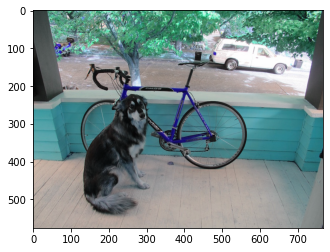

In [22]:
img = "/content/dog.jpg"
img = cv2.imread(img) # reads image
plt.imshow(img)

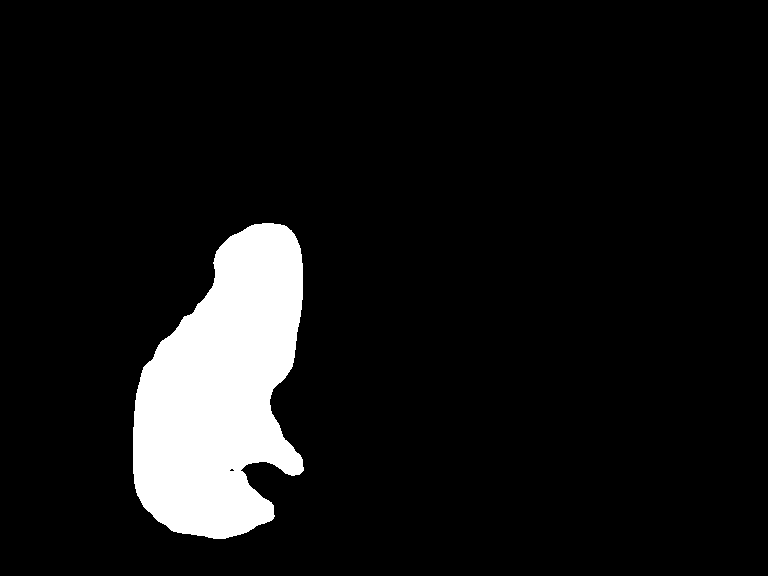

In [16]:
cv2_imshow(dog_mask)

In [17]:
igg = cv2.imread("/content/dog.jpg")

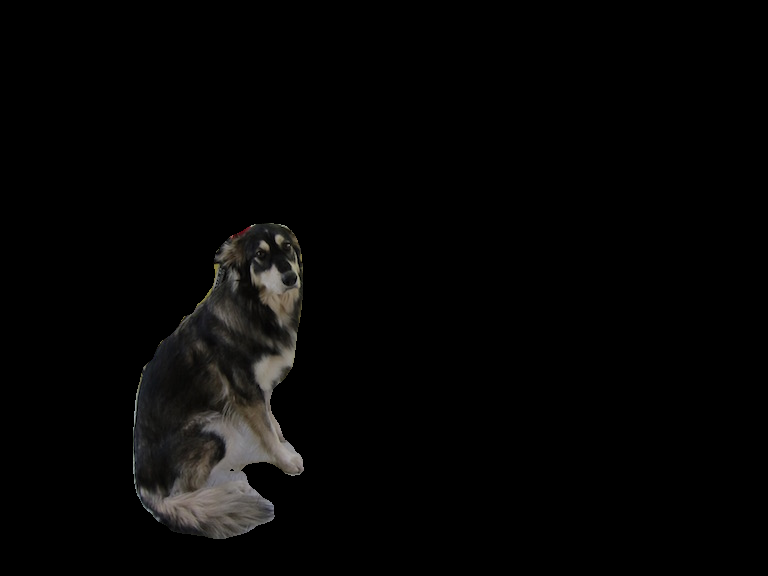

In [18]:
fin_img = cv2.bitwise_and(igg , igg , mask = dog_mask)
cv2_imshow(fin_img)